In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


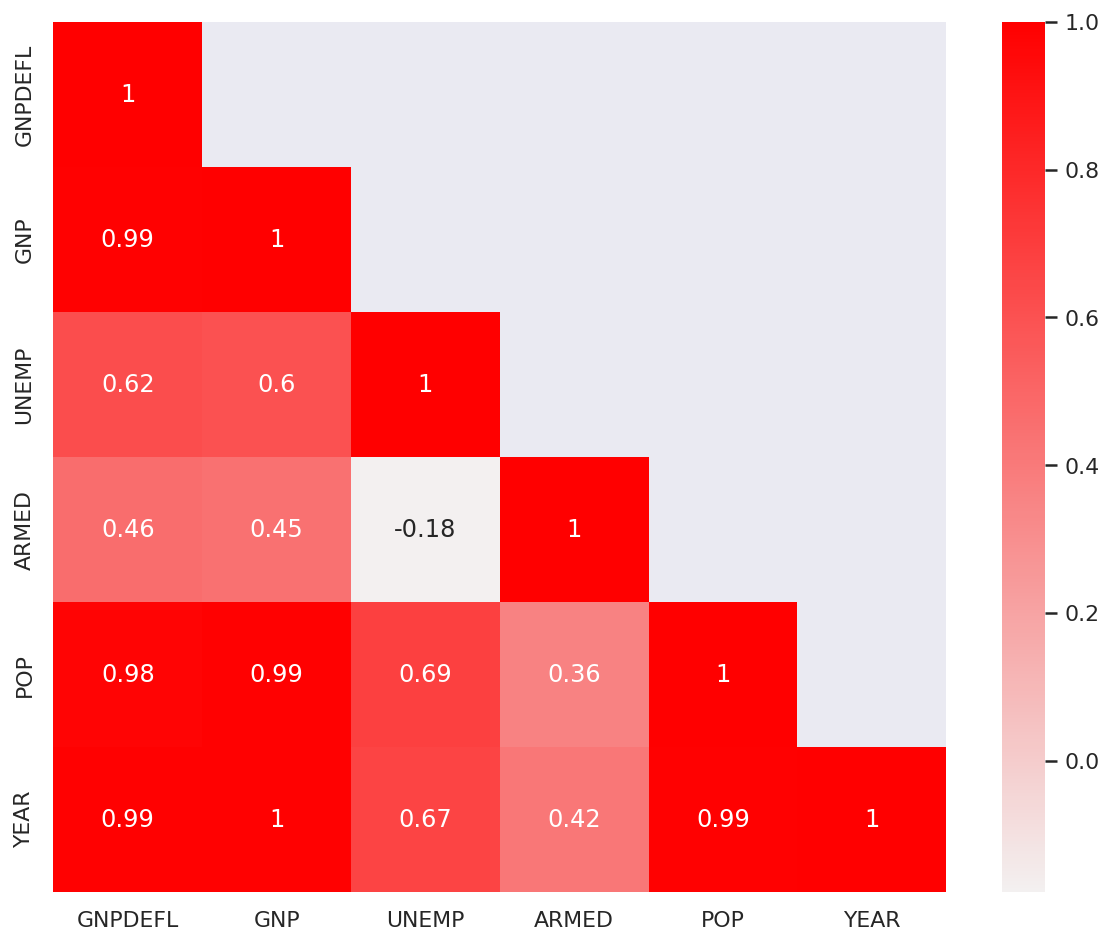

In [3]:
from statsmodels.datasets.longley import load_pandas

dfy = load_pandas().endog # 종속변수 이름: TOTEMP
dfX = load_pandas().exog
df = pd.concat([dfy, dfX], axis=1)

corr_M = dfX.corr() # 독립변수 상관관계
mask = np.array(corr_M)
mask[np.tril_indices_from(mask)] = False

plt.figure(figsize= (10,8))

sns.heatmap(corr_M, 
            cmap = sns.light_palette("red", as_cmap=True),
            annot = True, 
            mask = mask)

plt.show()

In [4]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

def get_model1(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ GNPDEFL + POP + GNP + YEAR + ARMED + UNEMP", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     437.5
Date:                Mon, 22 Aug 2022   Prob (F-statistic):             0.0366
Time:                        12:50:48   Log-Likelihood:                -44.199
No. Observations:                   8   AIC:                             102.4
Df Residuals:                       1   BIC:                             103.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.235e+07   2.97e+06     -4.165      0.1

In [5]:
from sklearn.metrics import r2_score

test1 = []

for i in range(10):
    df_train, df_test, result = get_model1(i)
    
    pred_test = result.predict(df_test)
    rsquared = r2_score(df_test.TOTEMP, pred_test)
    test1.append(round(rsquared,3))

test1

[0.982, 0.974, 0.988, 0.759, 0.981, 0.894, 0.88, 0.931, 0.861, 0.968]

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

lst = []

# 독립변수의 갯수 만큼 반복
for i in range(dfX.shape[1]):
    v = variance_inflation_factor(dfX.values, i) # 컬럼을 정수로 지정한다.
    lst.append(v)
    
vif["VIF Factor"] = lst
vif["features"] = dfX.columns
vif

,VIF Factor,features
0,12425.514335,GNPDEFL
1,10290.435437,GNP
2,136.224354,UNEMP
3,39.983386,ARMED
4,101193.161993,POP
5,84709.950443,YEAR


In [7]:
def get_model2(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ GNP + ARMED + UNEMP", data=df_train)
    
    return df_train, df_test, model.fit()


df_train, df_test, result2 = get_model2(3)
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     118.6
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           0.000231
Time:                        12:51:53   Log-Likelihood:                -57.695
No. Observations:                   8   AIC:                             123.4
Df Residuals:                       4   BIC:                             123.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.399e+04   1013.271     53.281      0.0

In [8]:
df_train.std()

TOTEMP      3325.272051
GNPDEFL       10.975224
GNP        92714.595875
UNEMP       1028.961751
ARMED        678.062523
POP         6499.246792
YEAR           4.566962
dtype: float64

In [9]:
def get_model3(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ scale(GNP) + scale(ARMED) + scale(UNEMP)", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result3 = get_model3(3)
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     118.6
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           0.000231
Time:                        12:52:16   Log-Likelihood:                -57.695
No. Observations:                   8   AIC:                             123.4
Df Residuals:                       4   BIC:                             123.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.538e+04    163.988    398.686   

In [10]:
from sklearn.metrics import r2_score

test2 = []

for i in range(10):
    df_train, df_test, result = get_model3(i)
    
    pred_test = result.predict(df_test)
    rsquared = r2_score(df_test.TOTEMP, pred_test)
    test2.append(round(rsquared,3))

test2

[0.976, 0.984, 0.969, 0.94, 0.977, 0.956, 0.98, 0.992, 0.984, 0.979]

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


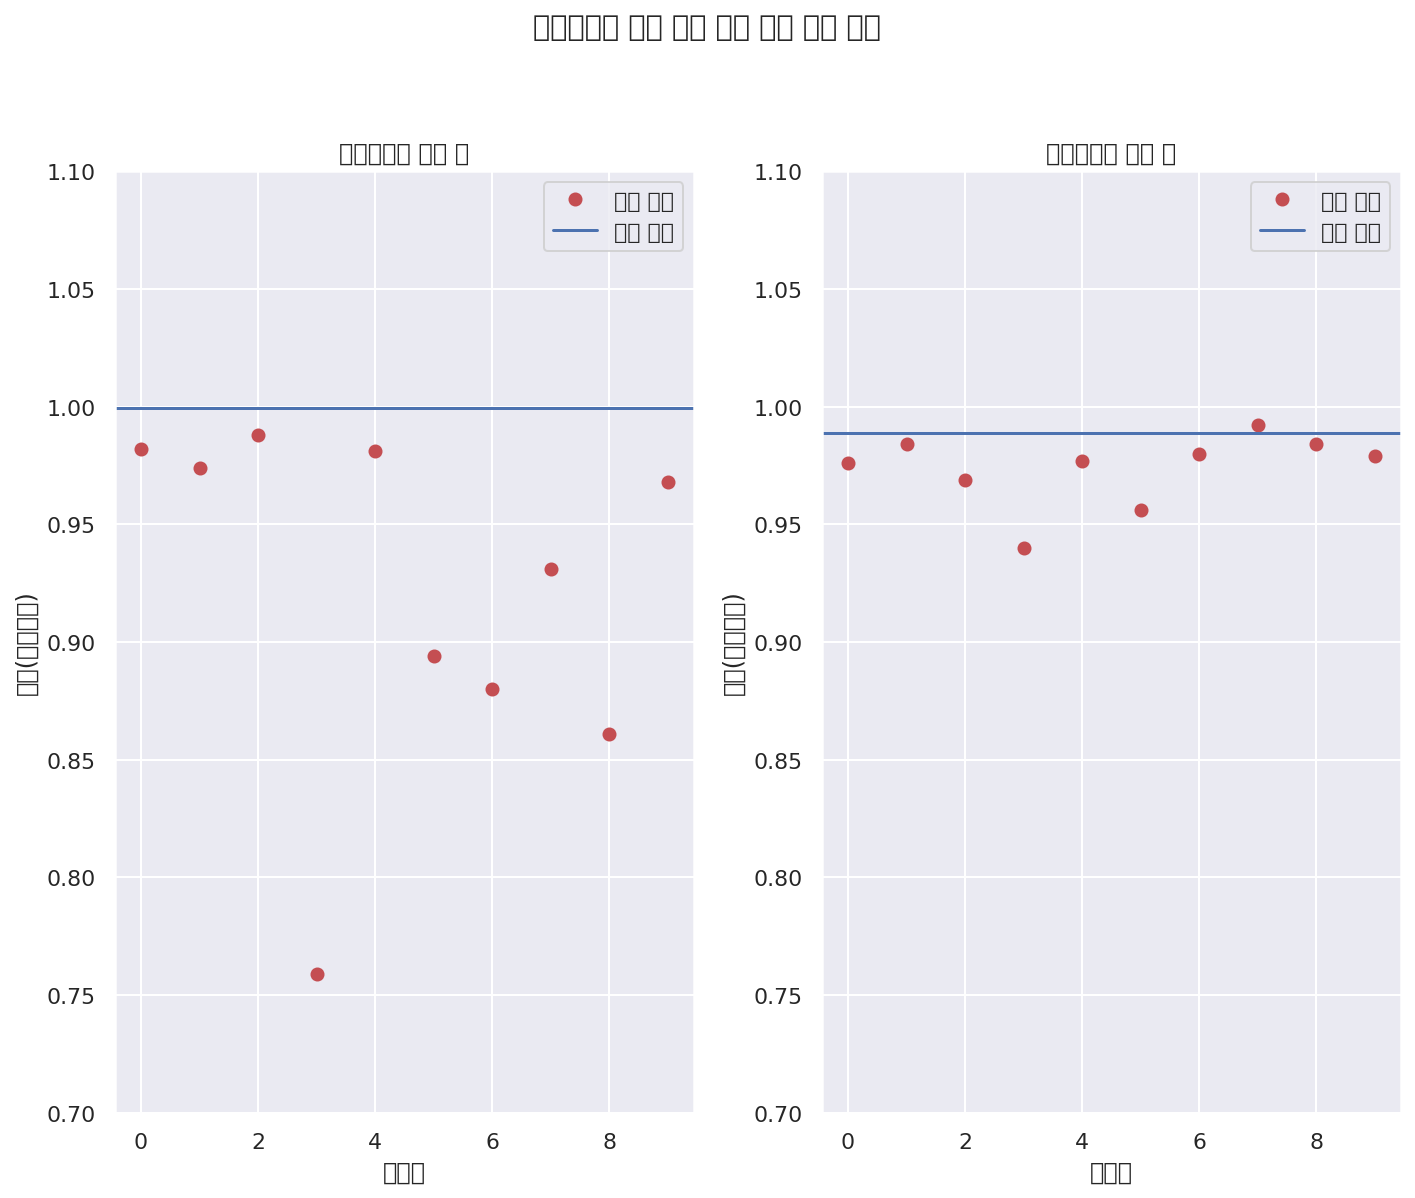

In [11]:
plt.subplot(121)
plt.plot(test1, 'ro', label="검증 성능")
plt.axhline(result1.rsquared, label="학습 성능")
plt.legend()
plt.xlabel("시드값")
plt.ylabel("성능(결정계수)")
plt.title("다중공선성 제거 전")
plt.ylim(0.7, 1.1)

plt.subplot(122)
plt.plot(test2, 'ro', label="검증 성능")
plt.axhline(result2.rsquared, label="학습 성능")
plt.legend()
plt.xlabel("시드값")
plt.ylabel("성능(결정계수)")
plt.title("다중공선성 제거 후")
plt.ylim(0.7, 1.1)

plt.suptitle("다중공선성 제거 전과 제거 후의 성능 비교", y=1.04)
plt.tight_layout()

https://jalynne-kim.medium.com/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%B3%80%EC%88%98-%EC%84%A0%ED%83%9D-feature-selecting-selectkbest-%EC%82%AC%EB%A1%80-%EC%97%B0%EC%8A%B5-%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9-%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC-%EB%B0%94%ED%83%95%EC%9C%BC%EB%A1%9C-bc8f5280b3a3